<a href="https://colab.research.google.com/github/Cloudydesuu/AITrainnning/blob/main/UCI_HAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
drsaeedmohsen_ucihar_dataset_path = kagglehub.dataset_download('drsaeedmohsen/ucihar-dataset')

print('Data source import complete.')


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Stage 1: Define the base directory for the dataset
# The dataset is the UCI Human Activity Recognition (HAR) dataset, stored in a specific directory
base_dir = "/kaggle/input/ucihar-dataset/UCI-HAR Dataset"

# Stage 2: Define a function to load data
# This function reads feature data (X) and labels (y) from text files, assuming whitespace-separated values
def load_data(X_path, y_path):
    X = pd.read_csv(X_path, delim_whitespace=True, header=None)  # Load feature data
    y = pd.read_csv(y_path, delim_whitespace=True, header=None)[0]  # Load labels (first column)
    return X, y


In [ ]:
# Stage 3: Load training and testing data
# Load the training and testing feature data (X) and labels (y) from their respective files
X_train, y_train = load_data(f'{base_dir}/train/X_train.txt', f'{base_dir}/train/y_train.txt')
X_test, y_test = load_data(f'{base_dir}/test/X_test.txt', f'{base_dir}/test/y_test.txt')

# Stage 4: Load activity labels and feature names
# Read activity labels (e.g., walking, sitting) and feature names from text files
activity_labels = pd.read_csv(f'{base_dir}/activity_labels.txt', sep='\s+', header=None, names=['id', 'label'])
features = pd.read_csv(f'{base_dir}/features.txt', sep='\s+', header=None, names=['id', 'name'])

# Stage 5: Assign feature names to training and testing data
# Set the column names of X_train and X_test to the feature names for better interpretability
X_train.columns = X_test.columns = features['name']

# Stage 6: Map numerical labels to activity names
# Convert numerical labels (e.g., 1, 2) to descriptive activity names (e.g., WALKING, SITTING) for readability
y_train_names = y_train.map(dict(zip(activity_labels['id'], activity_labels['label'])))
y_test_names = y_test.map(dict(zip(activity_labels['id'], activity_labels['label'])))

# Stage 7: Standardize the feature data
# Scale the feature data to have zero mean and unit variance, which is necessary for some models (e.g., SVM, MLP, KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform training data
X_test_scaled = scaler.transform(X_test)  # Transform testing data using the same scaler

/tmp/ipykernel_166/889433696.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X = pd.read_csv(X_path, delim_whitespace=True, header=None)  # Load feature data
/tmp/ipykernel_166/889433696.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y = pd.read_csv(y_path, delim_whitespace=True, header=None)[0]  # Load labels (first column)
/tmp/ipykernel_166/889433696.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X = pd.read_csv(X_path, delim_whitespace=True, header=None)  # Load feature data
/tmp/ipykernel_166/889433696.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y = pd.read_csv(y_path, delim

In [ ]:
# Stage 8: Define machine learning models
# Create a dictionary of models to evaluate, each with specific hyperparameters
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),  # Parallel processing
    "SVM": SVC(random_state=42),
    "Naive Bayes": GaussianNB(),
    "MLP": MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, random_state=42),  # Neural network
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "GBM": GradientBoostingClassifier(n_estimators=100, random_state=42)
}


Decision Tree
                    precision    recall  f1-score   support

           WALKING       0.83      0.92      0.87       496
  WALKING_UPSTAIRS       0.83      0.78      0.80       471
WALKING_DOWNSTAIRS       0.89      0.83      0.86       420
           SITTING       0.83      0.76      0.80       491
          STANDING       0.80      0.86      0.83       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.86      2947
         macro avg       0.86      0.86      0.86      2947
      weighted avg       0.86      0.86      0.86      2947



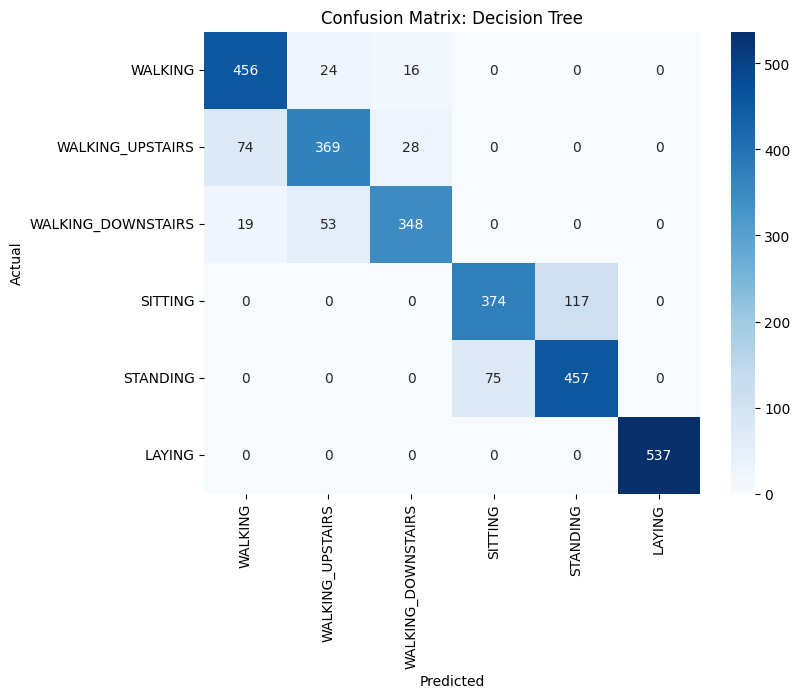


Random Forest
                    precision    recall  f1-score   support

           WALKING       0.89      0.97      0.93       496
  WALKING_UPSTAIRS       0.90      0.89      0.89       471
WALKING_DOWNSTAIRS       0.97      0.87      0.91       420
           SITTING       0.91      0.89      0.90       491
          STANDING       0.90      0.92      0.91       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.93      2947
         macro avg       0.93      0.92      0.92      2947
      weighted avg       0.93      0.93      0.93      2947



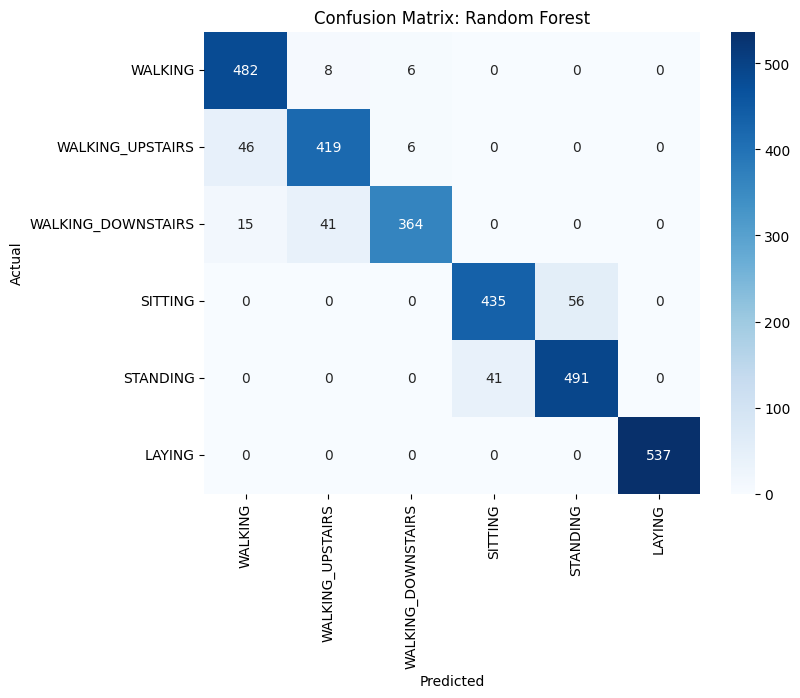


SVM
                    precision    recall  f1-score   support

           WALKING       0.96      0.97      0.97       496
  WALKING_UPSTAIRS       0.93      0.97      0.95       471
WALKING_DOWNSTAIRS       0.98      0.92      0.95       420
           SITTING       0.94      0.90      0.92       491
          STANDING       0.92      0.95      0.93       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.95      2947
         macro avg       0.95      0.95      0.95      2947
      weighted avg       0.95      0.95      0.95      2947



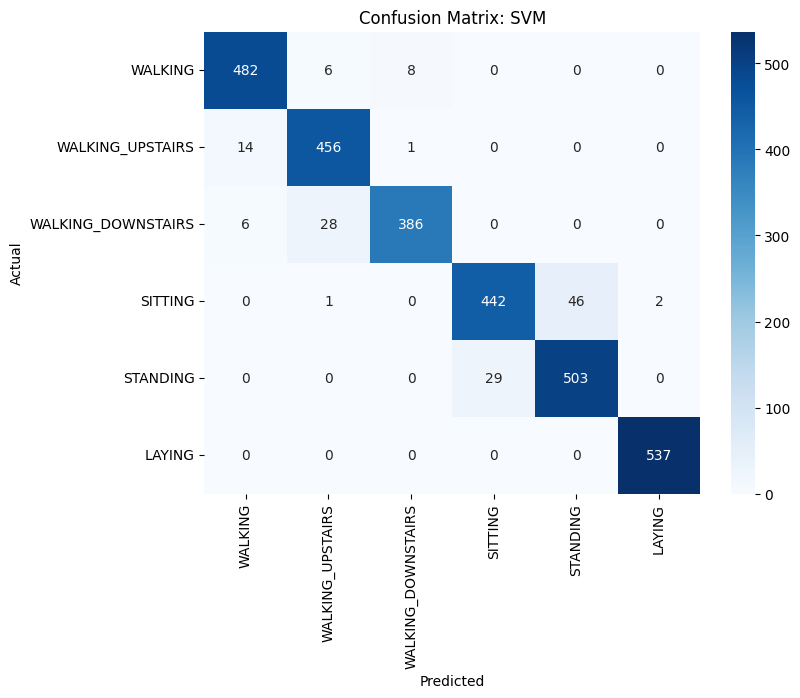


Naive Bayes
                    precision    recall  f1-score   support

           WALKING       0.82      0.84      0.83       496
  WALKING_UPSTAIRS       0.76      0.96      0.84       471
WALKING_DOWNSTAIRS       0.83      0.61      0.70       420
           SITTING       0.58      0.75      0.65       491
          STANDING       0.80      0.86      0.83       532
            LAYING       0.96      0.60      0.74       537

          accuracy                           0.77      2947
         macro avg       0.79      0.77      0.77      2947
      weighted avg       0.79      0.77      0.77      2947



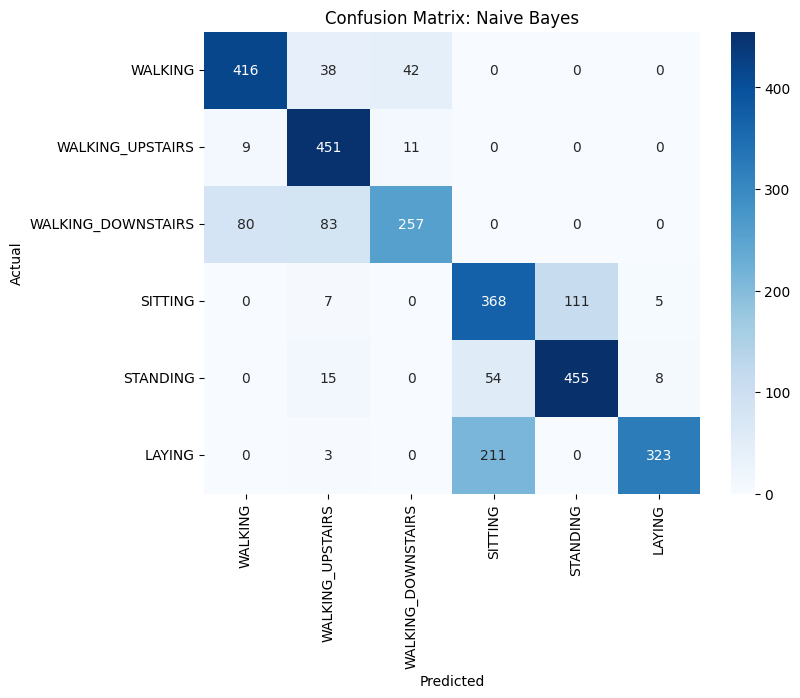


MLP
                    precision    recall  f1-score   support

           WALKING       0.94      0.99      0.97       496
  WALKING_UPSTAIRS       0.94      0.95      0.95       471
WALKING_DOWNSTAIRS       0.98      0.92      0.95       420
           SITTING       0.96      0.89      0.92       491
          STANDING       0.88      0.97      0.92       532
            LAYING       1.00      0.96      0.98       537

          accuracy                           0.95      2947
         macro avg       0.95      0.95      0.95      2947
      weighted avg       0.95      0.95      0.95      2947



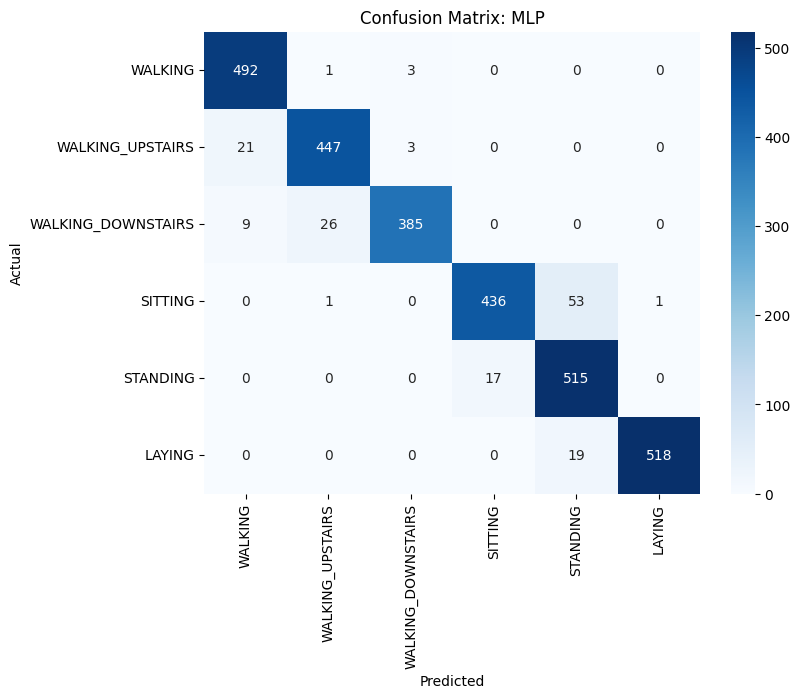


KNN
                    precision    recall  f1-score   support

           WALKING       0.82      0.97      0.89       496
  WALKING_UPSTAIRS       0.88      0.90      0.89       471
WALKING_DOWNSTAIRS       0.96      0.73      0.83       420
           SITTING       0.88      0.76      0.82       491
          STANDING       0.80      0.93      0.86       532
            LAYING       1.00      0.95      0.97       537

          accuracy                           0.88      2947
         macro avg       0.89      0.87      0.88      2947
      weighted avg       0.89      0.88      0.88      2947



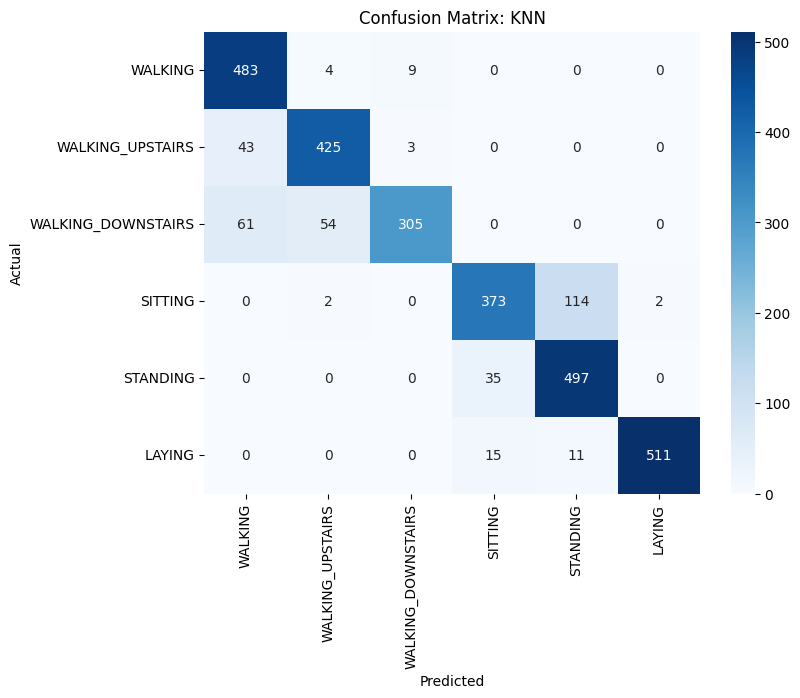


GBM
                    precision    recall  f1-score   support

           WALKING       0.94      0.98      0.96       496
  WALKING_UPSTAIRS       0.93      0.93      0.93       471
WALKING_DOWNSTAIRS       0.97      0.92      0.95       420
           SITTING       0.93      0.85      0.89       491
          STANDING       0.88      0.94      0.91       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.94      2947
         macro avg       0.94      0.94      0.94      2947
      weighted avg       0.94      0.94      0.94      2947



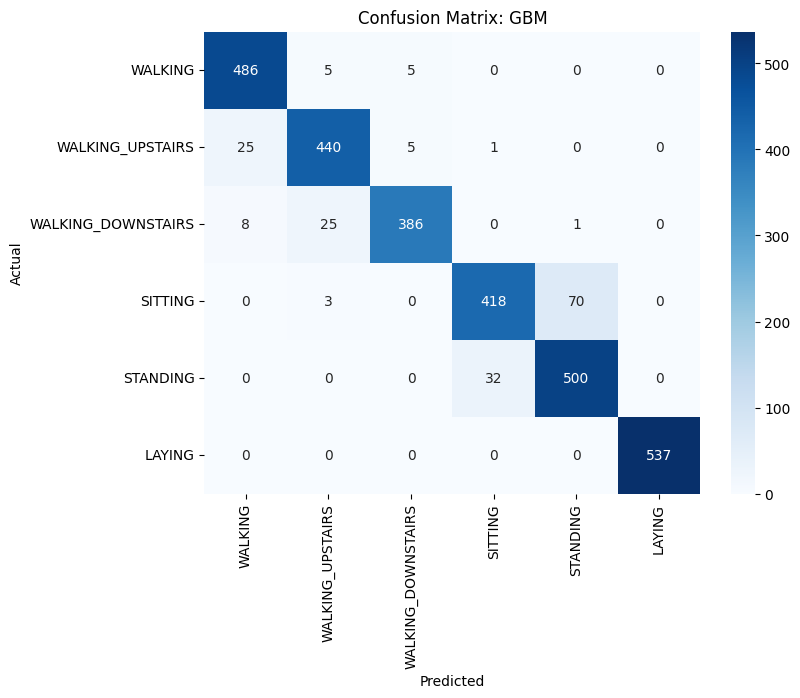

               accuracy  precision    recall        f1        time
SVM            0.952155   0.952594  0.952155  0.952068    7.991226
MLP            0.947743   0.949973  0.947743  0.947872   10.206686
GBM            0.938921   0.939911  0.938921  0.938744  897.310363
Random Forest  0.925687   0.926978  0.925687  0.925544    5.151455
KNN            0.880217   0.888331  0.880217  0.879025    0.645496
Decision Tree  0.862233   0.863273  0.862233  0.861652    5.273456
Naive Bayes    0.770275   0.794683  0.770275  0.768770    0.140398


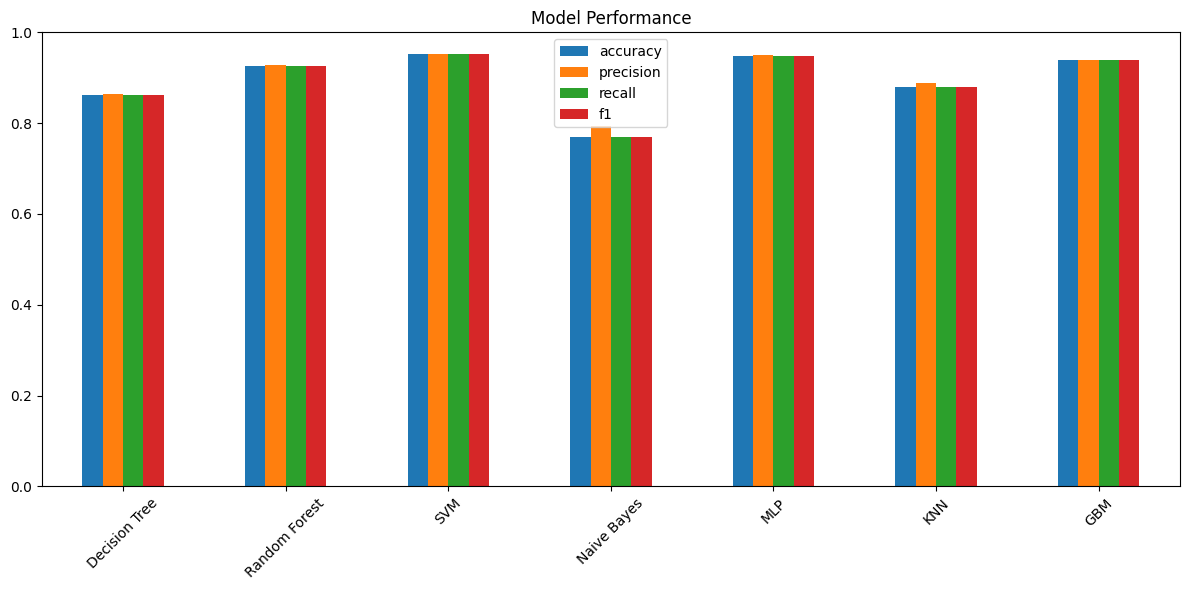

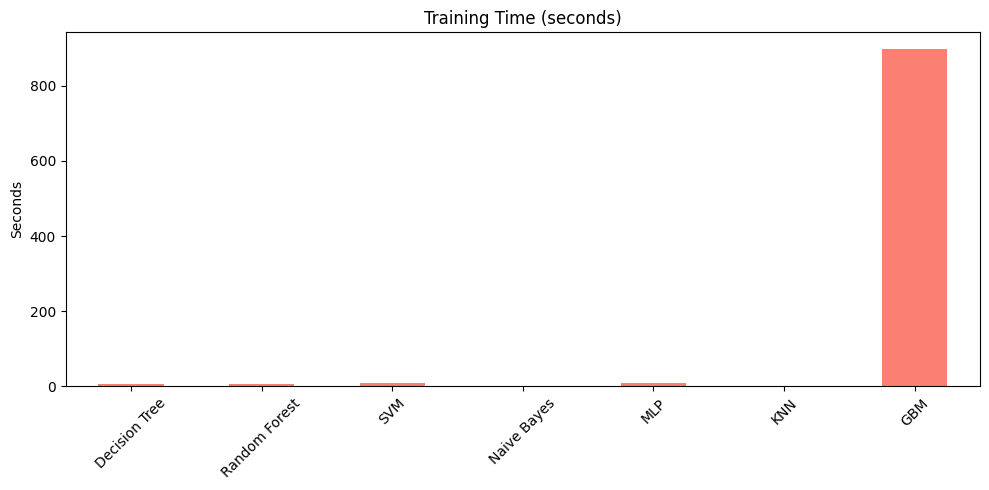

In [ ]:
# Stage 9: Train and evaluate models
# Dictionary to store evaluation metrics for each model
results = {}

for name, model in models.items():
    start = time.time()  # Record start time for training

    # Train models that require scaled data (SVM, MLP, KNN) on scaled features
    if name in ["SVM", "MLP", "KNN"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    # Train other models on unscaled features
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    end = time.time()  # Record end time for training

    # Store evaluation metrics: accuracy, precision, recall, F1-score, and training time
    results[name] = {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred, average='weighted', zero_division=0),
        "recall": recall_score(y_test, y_pred, average='weighted', zero_division=0),
        "f1": f1_score(y_test, y_pred, average='weighted', zero_division=0),
        "time": end - start
    }

    # Stage 10: Print classification report
    # Display detailed performance metrics for each activity class
    print(f"\n{name}\n{classification_report(y_test, y_pred, target_names=activity_labels['label'])}")

    # Stage 11: Plot confusion matrix
    # Visualize the confusion matrix as a heatmap to show prediction performance
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=activity_labels['label'],
                yticklabels=activity_labels['label'])
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Stage 12: Summarize and display model performance
# Convert results dictionary to a DataFrame and sort by accuracy
df = pd.DataFrame(results).T
print(df.sort_values("accuracy", ascending=False))

# Stage 13: Plot model performance metrics
# Create a bar plot comparing accuracy, precision, recall, and F1-score across models
df[['accuracy', 'precision', 'recall', 'f1']].plot(kind='bar', figsize=(12, 6), title="Model Performance")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Stage 14: Plot training times
# Create a bar plot showing the training time for each model
df['time'].plot(kind='bar', figsize=(10, 5), color='salmon', title="Training Time (seconds)")
plt.ylabel("Seconds")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()